# Bayesian Inference and Prior Choice

A (hopefully) gentle and practical introduction to Bayesian inference with some examples.

## Our Task
We have a client who has tasked us with inferring the mean value of a new data set.
Let $\omega$ be the mean of the data set we are looking for and $X$ is our dataset. In the Bayesian framework, we treat our unknown (latent or hidden) variables as random variables. For this problem, our unknown latent variable we are trying to infer the mean $\omega$, so we treat it as a random variable. The aim of Bayesian inference is to find a distribution over the variables that we do not know and cannot observe (our latent variables) in terms of distributions that we can observe (our data $X$).


That is, we want to find,

$$ \pi(\omega | X) $$

and this glorious distribution is the beloved/hated posterior. 


## How do we do this?

We have access to the joint distribution of the mean and our data set.
$$p(\omega, X)= p(\omega) p(X | \omega)$$

Can interpret this as the product of our prior belief for the unkown variable $p(\omega)$ and the likelihood $p(X | \omega)$ which is defined by our model. From this joint distribution, we can find our posterior,
$$\pi(\omega | X) = \dfrac{p(\omega, X)}{p(X)} = \dfrac{p(\omega) p(X | \omega)}{p(X)}$$

### What is our model?

To decide on what type of model/likelihood tpo use, we need to know what type of data we are working with. Lets say our client told us that the data is continuous and defined for all real valued numbers. For data like this, it might be suitable to use a Gaussian likelihood.

$$p(X | \omega) = N(\omega, \Sigma_X)$$

where the mean of our likelihood is given by the unknown mean that we are trying to infer, and $\Sigma_X$ is the covariance matrix of our data and we are assuming it is known.


### What is our prior?

Since are using a Gaussian distribution to model our data, it is convenient to use a Gaussian prior distribution over our mean.
$$ p(\omega) = N(\mu_0, \Sigma_0) $$

Our choice to use a normal distribution for the prior in this instance is for convenice. Since we have a simple linear model with a Gaussian likelihood, by using a Gaussian prior we can achieve a tractable posterior that is also a Gaussian. We can define $\mu$ and $\Sigma_\omega$ to be whatever we want, but we should define them such that they are consistent with our prior beliefs of how the mean might be distributed.

## What is the posterior?

Since we are using a conjugate Gaussian model, the posterior is analytically tractable. The posterior is given by,

$$\pi(\omega | X) = N(\mu, \Sigma)$$
where 
$$\Sigma^{-1} = \Sigma_0^{-1} + n\Sigma_X^{-1}$$
and
$$\mu= \Sigma \Big( n\Sigma_X^{-1}\bar{x} + \Sigma_0^{-1} \mu_0 \big)$$
where $\bar{x}$ is the emperical mean of the data set $X$ and $n$ is the number of samples in the dataset.

For a full derivation of the result, have a look at [1, Sec. 2.3; 2, Sec. 4.4; 3, Ch. 24]

### What does this mean?

Looking at our posterior above, we can see that the precision $\Sigma^{-1}$ will become infinite as the number of samples $n$ in our data set approaches infinity, meaning that our variance or uncertainty in our posterior approaches zero. This is an intuitive result, that if we have seen all the data there is to see, we should be infinitely precise about our inference; we have seen all there is to see so there is no uncertainty in our inference. Of course in practice, we will never have an infinite amount of data, so we should always expect some uncertainty in all infered latent variables.




## What is the effect of the prior?
### Mild detour on prior choice in general
How should we select our prior?

In all practical cases, we should have at least some idea to what our posterior should be like; the only thing that varies from problem to problem is how much we know a priori and how confident we are in this prior knowledge. This is where we incorporate our domain expertise. If we know that the variable we are trying to perform inference over is continuous but can never be negative, then we might not use a Gaussian distribution to model our prior knowledge (it still might be reasonable to do this though). Instead we might opt for something like a Poisson distribution. If we know that our value we are trying to infer is bounded the interval [0, 1], we could use something like a Beta distribution for our prior. If we are confident that our posterior should be centred around a certain value, we could use a distribution with low variance (strong prior). If we aren't very sure, we could use a distribution centred on the same point, but with much larger variance (vague prior). 


The above description for prior choice does not concern itself with the tractability of the problem at hand. In the example we worked through here, we used a Gaussian distribution for our prior not only because we believe it is suitable conceptually, but also (and sometimes more importantly) because it is conjugate to our likelihood. Since it is conjugate, we can yield an analytic solution to the posterior. For example, if for some reason I was certain that the mean value we are trying to find the posterior distribution for was strictly positive, we may have opted for a prior such as a Poisson. Doing this might make our new exact posterior more accurate, but the problem is that we cannot compute this new exact posterior and would have to rely on approximate inference methods (such as MCMC or VI).
The choice of a conjugate model can greatly simply modelling, though for instances when methods these approximate methods are used, conjugate models are less important.


### Putting prior choice into practice

For our problem here, we will investigate howe prior choice can affect the result of our inference. To do this, we will continue with our role-playing.

Pretending for this example that the toy data was given to you by some client, and let's say they are an expert in the type of data they have given you (which is often the case in practice). Now lets say that your client informs you that they think the mean might be centred at the origin, but they really aren't that sure. For this, we might use a vague type of prior; one that covers a larger range with less mass. For this lets use a Gaussian centered at zero but with a larger variance. Let's also assume that they only gave you a very, very, very tiny subset of the full dataset to work with (in this first example we will just use two data points). Let' perform the inference and see how we fair.


In [1]:
# import everything from my HMC python code
from hmc_demo import *

Accept Ratio = 0.844
true mean = [[0.19847555]
 [0.79207939]]


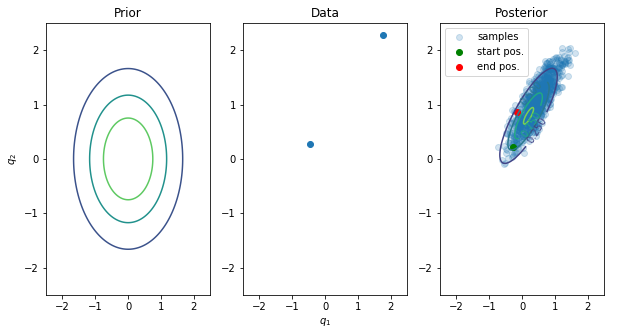

In [2]:
  np.random.seed(1)
  # test with vague prior with few points to train on
  simple_gaussian_hmc(n_samp=2, prior_mean=[0.0, 0.0], prior_cov=np.eye(2),
                      plot_name='vague_prior_small_data')


The left-most figure illustrates our prior, the middle our data samples with which we are performing inference over, and  the right is our posterior. In the posterior, the true posterior is represented by the level curves, and the blue dots represent samples from the posterior distribution from a Hamilton/Hybrid Monte Carlo inference implementation (not important for this current tutorial). 

We see that where the posterior distribution is centered seems reasonable, but the variance in our estimate is quite large. 

In this hypothetical role-playing scenario, lets say your client comes along and says they have way more data to give you. Lets find our posterior distribution now with the same vague prior but with this significantly increased data set.


Accept Ratio = 0.062
true mean = [[0.8204742 ]
 [1.81109837]]


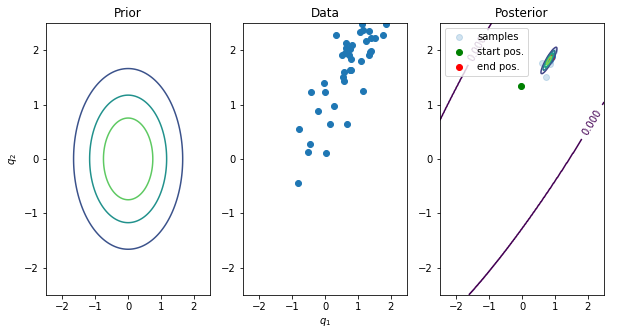

In [3]:
  np.random.seed(1)
  # test with vague prior with much larger data set to train on
  simple_gaussian_hmc(n_samp=50, prior_mean=[0.0, 0.0], prior_cov=np.eye(2),
                      plot_name='vague_prior_small_data')


We see that this time we our posterior is centred much better around the mean, and with significantly reduced variance. This is the result we expect; in constructing this problem we saw that our precision in our posterior should increase as we see more data, meaning that the variance should decrease. This is exactly what we see here. Even though we used a vague type of prior, we achieve good approximations to the true mean with very little uncertainty.

Lets go through another scenario, the same small data set before, but now your client informs you that they now have a strong belief that the mean of the data is located at (0.9, 1.6). Lets perform Bayesian inference to see how our posterior looks with a stronger, more informative prior.

Accept Ratio = 0.864
true mean = [[0.88125875]
 [1.51988597]]


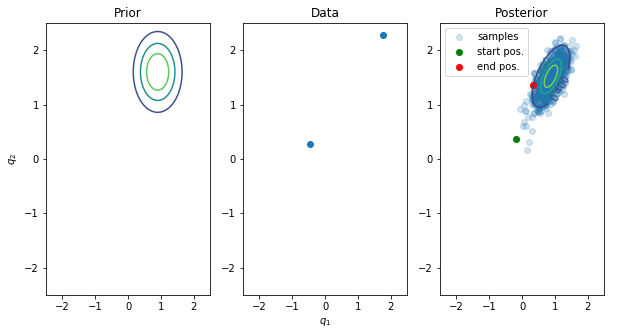

In [4]:
  np.random.seed(1)
  # test with strong prior with the tiny dataset
  simple_gaussian_hmc(n_samp=2, prior_mean=[0.9, 1.6], prior_cov=0.2*np.eye(2),
                      plot_name='strong_prior_small_data')

Comparing our results now with the previous example with a vague prior and the small data set, we see that we get a posterior with significantly reduced variance. This is because our prior was much more consistent with the data.

This is an important property for many models, particularly when approximate inference methods such as MCMC are used. To illustrate this, lets have a look at an example with the same data set, but with a very poor choice for our prior.

Accept Ratio = 0.672
true mean = [[-1.4729241 ]
 [-1.05740141]]


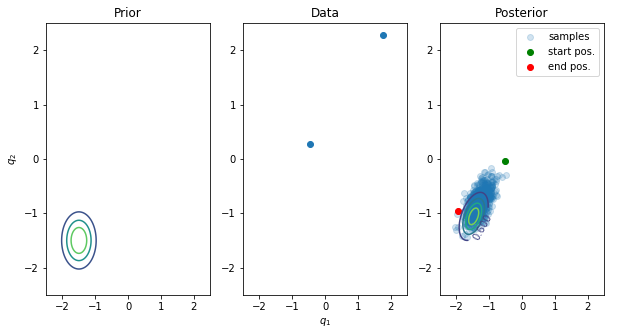

In [5]:
  np.random.seed(1)
  # test with strong, poorly selected prior with the tiny data set
  simple_gaussian_hmc(n_samp=2, prior_mean=[-1.5, -1.5], prior_cov=0.1*np.eye(2),
                      plot_name='strong_poor_prior_small_data')

We now see that with this model, our posterior is very poor. This is an extreme example; it doesn't seem reasonable to have such a strong prior for such a small data set, and it doesn't make any sense given that it is obviously such a poor choice. It is here to illustrate the affect the prior choice can have. (Sidenote: given the poor modelling choice, it is difficult for the HMC method to sample from the posterior. For real, practical problems of interest, this is a affect is significant.) 

If we have strong belief about what our posterior should look like, we should ***definitely incorporate*** that into our model. This example here is not designed to scare away the use of informed priors. For many models, without the use of informed priors you are unlikely to yield any reasonable approximations to the posterior. This example is merely aimed to illustrate the affect the prior can have the posterior.

As stated, the previous example is an extreme (and frankly silly case) that would never happen in practice. Lets have a look at another silly case, but perhaps a little less silly. Lets have a look at what happens to our posterior when we use the same strong, poor posterior, but lets use the all the data.

Accept Ratio = 0.019
true mean = [[0.09008536]
 [1.06322792]]


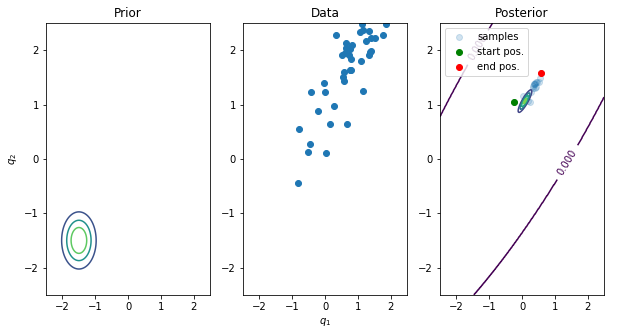

In [6]:
  np.random.seed(1)
  # test with strong, poorly selected prior with the larger data set
  simple_gaussian_hmc(n_samp=50, prior_mean=[-1.5, -1.5], prior_cov=0.1*np.eye(2),
                      plot_name='strong_poor_prior_large_data')

We see that now that we have more data, our true posterior is dominated by our likelihood and our posterior is far more reasonable than before.

#### Another sidenote - Practical considerations:
Note here for this example that whilst the true posterior (the level curves) are much better, it many of the samples from the HMC approximation method lie away from the true posterior. This is a significant issue for more practical problems, as the true posterior will be intractable and we must resort to approximation methods such as MCMC. This highlights how poor choice of prior (and overall model and general) can highlight can inhibit the inference process.

Again, it is emphasised that this is still a silly and extreme example to highlight the possible affects the prior choice can have. Just looking at the data we can see that the prior choice is absurd. These examples are merely to highlight the importance and significance of careful model design. If we have a strong prior belief, we should incorporate that into the model, we just need to make sure that our prior is consistent with our data. If we are unsure, we should stick with a vague prior to allow the likelihood to contribute more to the posterior.

## References
[1] Bishop, C, *Pattern Recognition and Machine Learning*, Springer, 2006
    Free from https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book
    
[2] Murphey, K., *Machine Learning, A Probabilistic Perspective*, MIT Press, 2012

[3] Mackay, D., *Information Theory; Inference and Learning Algorithms*, Cambridge University Press, 2003
    Free from http://www.inference.org.uk/itila/book.html
